## TD 1 Portfolio Allocation : Markowitz Portfolio Theory

#### Exercise 1 : Data for exercise

In [ ]:
# Equity USA, Equity EMU, Bond EUR Sovereign, Bond EUR IG Corp, Cash
import numpy as np
mu = np.array([0.052,0.066,0.043,0.026,0.002])
sigma = np.array([0.133,0.154,0.083,0.045,0.005])
rho = np.array([[1.0,0.821,-0.05,0.25,0],
       [0.821,1.0,-0.14,0.10,0],
       [-0.05,-0.14,1.0,0.67,0],
       [0.25,0.10,0.67,1.0,0],
       [0,0,0,0,1.0]])

#### Exercise 2 : Mean Variance Optimization (MVO)

In [ ]:
import cvxpy as cp

In [ ]:
n = len(mu)
w = cp.Variable(n)
max_risk = 0.010
Sigma = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    Sigma[i,j] = rho[i,j]*sigma[i]*sigma[j]

Sigma

array([[ 1.7689000e-02,  1.6815722e-02, -5.5195000e-04,  1.4962500e-03,
         0.0000000e+00],
       [ 1.6815722e-02,  2.3716000e-02, -1.7894800e-03,  6.9300000e-04,
         0.0000000e+00],
       [-5.5195000e-04, -1.7894800e-03,  6.8890000e-03,  2.5024500e-03,
         0.0000000e+00],
       [ 1.4962500e-03,  6.9300000e-04,  2.5024500e-03,  2.0250000e-03,
         0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.5000000e-05]])

In [ ]:
# Define the objective function: maximize returns
objective = cp.Maximize(mu.T @ w)

# Define the constraints
constraints = [
    w.T @ Sigma @ w <= max_risk,  # Risk constraint (variance)
]

# Define and solve the problem
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Output the results
print("Optimal weights w_MVO:", np.round(w.value,2))
print("Maximum expected return:", np.round(result*100,2), "%")
print("Portfolio variance:", np.round(cp.quad_form(w, Sigma).value,2))

Optimal weights w_MVO: [-0.09  0.41  0.57  0.74  9.42]
Maximum expected return: 8.49 %
Portfolio variance: 0.01


By solving directly the optimization problem $w_{MVO} = argmax(\hat{\mu}^Tw)$ under the constraint : $w^T \hat{\Sigma} w \le 10\%^2$, we get the formula : $$w_{MVO} = \frac{10\%\hat{\Sigma}^{-1}\hat{\mu}}{(\hat{\mu}^T\hat{\Sigma} \hat{\mu} )^{1/2}}$$

In [ ]:
# Using formulas deduced from the resolution of the optimization problem :
# Different from during the class as here we maximize the return under constraint
# of the risk whereas we saw the minimization of the risk under constraint on the return.
num = (max_risk)**(1/2) * np.linalg.inv(Sigma) @ mu
den = (mu.transpose() @ np.linalg.inv(Sigma) @ mu)**(1/2)
w = num / den
print("Optimal weights w_MVO:", np.round(w,2))

Optimal weights w_MVO: [-0.09  0.41  0.57  0.74  9.42]


We want to achieve the same result with the following utility function : $w_{MVO} = argmax(\hat{\mu}^Tw-\lambda w^T \hat{\Sigma} w)$. By solving, we get : $w_{MVO}=\frac{1}{2\lambda} \hat{\Sigma}^{-1} \hat{\mu}$
Therefore, we need to have $$\lambda = \frac{(\hat{\mu}^T \Sigma^{-1} \hat{\mu})^{1/2}}{2*10\%}$$

In [ ]:
lamb = (mu.T @ np.linalg.inv(Sigma) @ mu)**(1/2) / (2*max_risk**(1/2))
w = 1/(2*lamb) * np.linalg.inv(Sigma) @ mu
print("La valeur de lambda est :", np.round(lamb,2))
print("Optimal weights w_MVO:", np.round(w,2)) # To check that w_MVO has the correct values.

La valeur de lambda est : 4.25
Optimal weights w_MVO: [-0.09  0.41  0.57  0.74  9.42]


#### Exercise 3 : Efficient Frontier

In [ ]:
import matplotlib.pyplot as plot

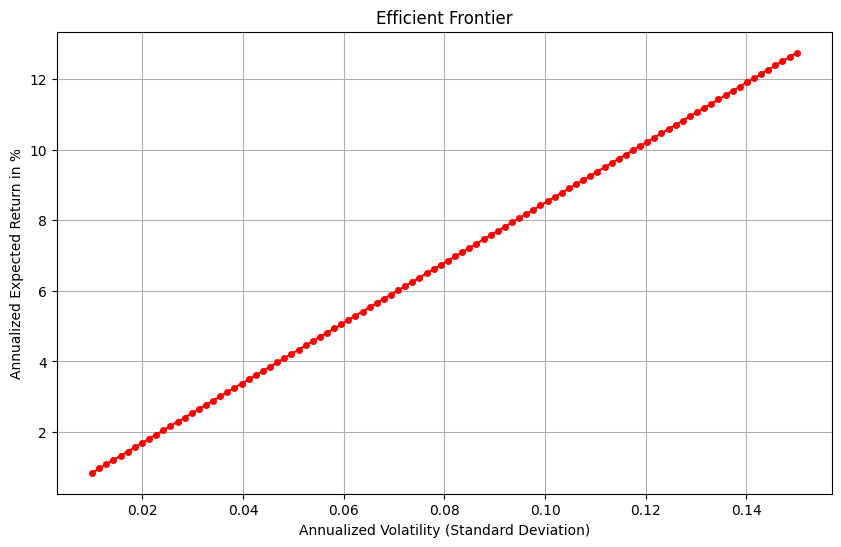

In [ ]:
vector_risk = np.linspace(0.01, 0.15, 100)

expected_returns = []

for risk in vector_risk:
  w = cp.Variable(n)
  objective = cp.Maximize(mu.T @ w)
  constraints = [w.T @ Sigma @ w <= risk**2,  # Risk constraint (variance)
  ]
  prob = cp.Problem(objective, constraints)
  result = prob.solve()

  if prob.status == 'optimal':
    expected_returns.append(result*100)
  else:
    expected_returns.append(np.nan) # To handle cases where optimization fails

plt.figure(figsize=(10, 6))
plt.plot(vector_risk, expected_returns, marker='o', linestyle='-', color = "r", markersize=4)
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

As expected, we get that the annualized returns have a linear relationaship with the annuliazed volatility. Indeed, the formula obtained was : $$w_{MVO} = \frac{vol*\hat{\Sigma}^{-1}\hat{\mu}}{(\hat{\mu}^T\hat{\Sigma} \hat{\mu} )^{1/2}}$$

#### Exercise 4 : Constraints

We are going to add a positive constraint to this problem.

In [ ]:
w = cp.Variable(n)

# Define the objective function: maximize returns
objective = cp.Maximize(mu.T @ w)

# Define the constraints
constraints = [
    w.T @ Sigma @ w <= max_risk,  # Risk constraint (variance)
    w >= 0 # Positive constraint
]

# Define and solve the problem
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Output the results
print("Optimal weights w_MVO:", np.round(w.value,2))
print("Maximum expected return:", np.round(result*100,2), "%")
print("Portfolio variance:", np.round(cp.quad_form(w, Sigma).value,2))

Optimal weights w_MVO: [0.   0.35 0.58 0.67 9.44]
Maximum expected return: 8.48 %
Portfolio variance: 0.01


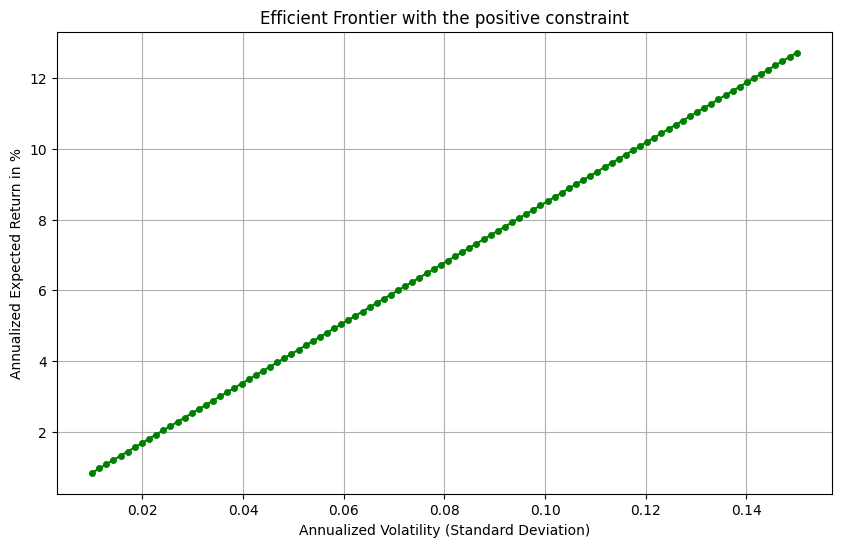

In [ ]:
vector_risk = np.linspace(0.01, 0.15, 100)
expected_returns_2 = []

for risk in vector_risk:
  w = cp.Variable(n)
  objective = cp.Maximize(mu.T @ w)
  constraints = [
    w.T @ Sigma @ w <= risk**2,  # Risk constraint (variance)
    w >= 0 # Positive constraint
  ]
  prob = cp.Problem(objective, constraints)
  result = prob.solve()

  if prob.status == 'optimal':
    expected_returns_2.append(result*100)
  else:
    expected_returns_2.append(np.nan) # To handle cases where optimization fails

plt.figure(figsize=(10, 6))
plt.plot(vector_risk, expected_returns_2, marker='o', linestyle='-', color = "g", markersize=4)
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Expected Return in %')
plt.title('Efficient Frontier with the positive constraint')
plt.grid(True)
plt.show()

And now with a positive constraint and a full investment constraint, meaning that the sum of all weights must be equal to 1.

In [ ]:
w = cp.Variable(n)

# Define the objective function: maximize returns
objective = cp.Maximize(mu.T @ w)

# Define the constraints
constraints = [
    w.T @ Sigma @ w <= max_risk,  # Risk constraint (variance)
    w >= 0, # Positive constraint
    cp.sum(w) == 1 # Full investment constraint
]

# Define and solve the problem
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Output the results
print("Optimal weights w_MVO:", np.round(w.value,2))
print("Maximum expected return:", np.round(result*100,2), "%")
print("Portfolio variance:", np.round(cp.quad_form(w, Sigma).value,2))

Optimal weights w_MVO: [0.   0.65 0.35 0.   0.  ]
Maximum expected return: 5.79 %
Portfolio variance: 0.01


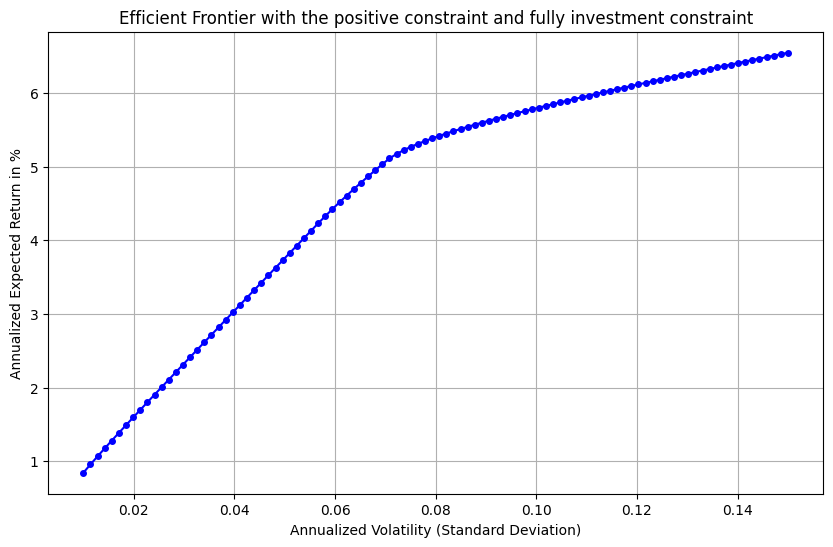

In [ ]:
vector_risk = np.linspace(0.01, 0.15, 100)
expected_returns_3 = []

for risk in vector_risk:
  w = cp.Variable(n)
  objective = cp.Maximize(mu.T @ w)
  constraints = [
    w.T @ Sigma @ w <= risk**2,  # Risk constraint (variance)
    w >= 0, # Positive constraint
    cp.sum(w) == 1 # Full investment constraint
  ]
  prob = cp.Problem(objective, constraints)
  result = prob.solve()

  if prob.status == 'optimal':
    expected_returns_3.append(result*100)
  else:
    expected_returns_3.append(np.nan) # To handle cases where optimization fails

plt.figure(figsize=(10, 6))
plt.plot(vector_risk, expected_returns_3, marker='o', linestyle='-', color = "b", markersize=4)
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Expected Return in %')
plt.title('Efficient Frontier with the positive constraint and fully investment constraint')
plt.grid(True)
plt.show()

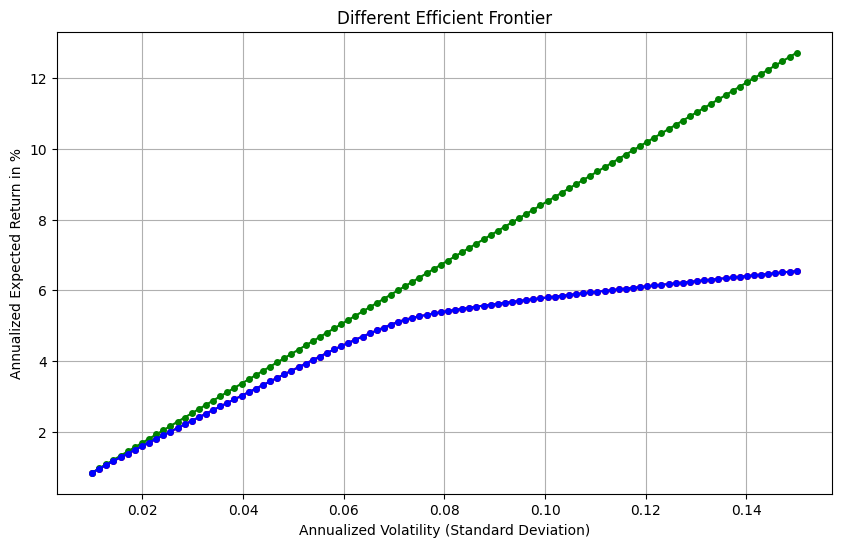

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(vector_risk, expected_returns, marker='o', linestyle='-', color = "r", markersize=4)
plt.plot(vector_risk, expected_returns_2, marker='o', linestyle='-', color = "g", markersize=4)
plt.plot(vector_risk, expected_returns_3, marker='o', linestyle='-', color = "b", markersize=4)
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Expected Return in %')
plt.title('Different Efficient Frontier')
plt.grid(True)
plt.show()

With no constraints, we have the lowest risk due to maximum flexibility. By adding a positivity constraint, the risk increases due to no short-selling. With the positivity constraint and the full investment constraint, the risk increases further due to the additional constraint that weights sum to one.
In summary, introducing constraints makes the optimization less flexible, leading to higher portfolio risk for a given return level. The efficient frontier shifts downwards as constraints are added, as for a given risk level, the maximum return decreases.